Dataset

BONDORA PEER-TO-PEER LENDING DATA - https://ieee-dataport.org/open-access/bondora-peer-peer-lending-data

### Business Case
##### * During Peer to Peer money lending process, when borrower approarches asking to lend money, peer has to decide whether he can lend or not. 
##### *The only fear here is whether the peer gets money(principal + interest) back or not with in the time which is represented by a feature called Default. 
##### *So here we are trying to predict on behalf of lender whether he can lend or not to make sure lender's money comes back as expected using Responsible AI techniques.

### Import Libraries for EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('D:\\jio institute\\q3\\responsible_ai\\coding-assign\\Bondora_dataset\\Bondora_dataset\\Bondora_preprocessed.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  object 
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  object 
 9   LanguageCode                            77394 non-null  object 
 10  Age                                     77394 non-null  in

In [5]:
df.isna().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
LoanDate                                      0
FirstPaymentDate                              0
MaturityDate_Original                         0
MaturityDate_Last                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
County                                    20515
City                                       5044
UseOfLoan                               

In [6]:
df['Default'].value_counts()

1    45772
0    31622
Name: Default, dtype: int64

In [7]:
# drop the columns 'PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL', 'County' as the missing values for these columns are very high

df.drop(['PreviousRepaymentsBeforeLoan', 'CreditScoreEsMicroL', 'County'], axis = 1, inplace = True)

In [8]:
# Now we'll remove the rows with null entries in it

req_df = df.dropna().reset_index(drop = True)

In [9]:
len(req_df)

61155

In [10]:
req_df['Default'].value_counts()

1    37228
0    23927
Name: Default, dtype: int64

In [11]:
req_df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
0,3110,0,2390.0,Existing_credit_customer,06-01-2015,16-02-2015,15-01-2020,15-01-2020,Income_expenses_verified,Estonian,...,No,5500.00,3049.61,0.00,0.00,1,3000.0,0,0,2015
1,1200,0,0.0,Existing_credit_customer,06-01-2015,13-02-2015,13-01-2020,13-01-2020,Income_expenses_verified,Russian,...,No,1200.00,337.29,0.00,0.00,1,500.0,0,0,2015
2,0,0,1000.0,New_credit_Customer,06-01-2015,20-02-2015,20-01-2020,20-01-2020,Income_unverified,Estonian,...,No,1000.00,272.99,0.00,0.00,0,0.0,0,0,2015
3,1000,0,0.0,New_credit_Customer,06-01-2015,05-03-2015,05-02-2020,05-02-2020,Income_unverified,Finnish,...,No,1000.00,462.42,0.00,0.00,0,0.0,0,0,2015
4,225,0,3875.0,Existing_credit_customer,06-01-2015,16-02-2015,15-01-2020,15-01-2020,Income_expenses_verified,Estonian,...,No,4100.00,4488.50,0.00,0.00,1,1500.0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,2515,0,485.0,New_credit_Customer,06-01-2015,02-03-2015,03-02-2020,03-02-2020,Income_verified,Finnish,...,No,2308.19,0.00,0.00,0.00,0,0.0,0,0,2015
61151,1880,0,1120.0,Existing_credit_customer,06-01-2015,05-03-2015,05-02-2020,20-02-2019,Income_verified,Finnish,...,No,3000.00,1990.03,0.00,0.00,1,3000.0,0,0,2015
61152,1975,0,525.0,New_credit_Customer,06-01-2015,02-03-2015,03-02-2020,03-02-2020,Income_unverified,Finnish,...,No,1869.76,199.33,630.24,1227.98,0,0.0,0,1,2015
61153,1840,0,1160.0,Existing_credit_customer,06-01-2015,02-03-2015,03-02-2020,03-08-2020,Income_expenses_verified,Estonian,...,Yes,2257.54,561.53,0.00,0.00,1,500.0,0,0,2015


### Identifying the proxy features

In [12]:
numeric_columns = req_df.select_dtypes(include = np.number).columns

In [13]:
categorical_columns = set(req_df.columns) - set(numeric_columns)

In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
for i in categorical_columns:
    mi = mutual_info_score(req_df['Country'], req_df[i])
    print("Mutual Information score between Country and " + i + " is:", mi)

Mutual Information score between Country and MaturityDate_Last is: 0.26785257204645635
Mutual Information score between Country and EmploymentStatus is: 0.04092494493975636
Mutual Information score between Country and UseOfLoan is: 0.04082531427374062
Mutual Information score between Country and LastPaymentOn is: 0.19552692182489695
Mutual Information score between Country and MaturityDate_Original is: 0.30644166201325107
Mutual Information score between Country and FirstPaymentDate is: 0.30735004930345367
Mutual Information score between Country and LanguageCode is: 0.9948574326435535
Mutual Information score between Country and EmploymentDurationCurrentEmployer is: 0.03884795893014355
Mutual Information score between Country and Gender is: 0.10915270432310793
Mutual Information score between Country and City is: 1.0144115988739548
Mutual Information score between Country and Education is: 0.06855796011135566
Mutual Information score between Country and Rating is: 0.3031237965641392
M

##### Here the mutual information score is high between the City and Country

In [16]:
for i in categorical_columns:
    mi = mutual_info_score(req_df['City'], req_df[i])
    print("Mutual Information score between City and " + i + " is:", mi)

Mutual Information score between City and MaturityDate_Last is: 2.975174964794858
Mutual Information score between City and EmploymentStatus is: 0.4202972173276597
Mutual Information score between City and UseOfLoan is: 0.5363809499027833
Mutual Information score between City and LastPaymentOn is: 2.8129846891294523
Mutual Information score between City and MaturityDate_Original is: 2.810877282153118
Mutual Information score between City and FirstPaymentDate is: 2.644859295437691
Mutual Information score between City and LanguageCode is: 1.092832553104886
Mutual Information score between City and EmploymentDurationCurrentEmployer is: 0.38694356484624826
Mutual Information score between City and Gender is: 0.24638763612198045
Mutual Information score between City and City is: 6.245958384933365
Mutual Information score between City and Education is: 0.3433481671267375
Mutual Information score between City and Rating is: 0.54602620428034
Mutual Information score between City and Occupatio

###### Here the mutual information score is high between city and country; city and lanugage code

##### As it is possible to identify the city and language code with each other. So, they act as proxy to one another. Hence we are droping the proxy features

In [17]:
req_df.drop(['LanguageCode', 'City'], axis = 1, inplace = True)

##### Country may act as a PII data, where peers of some country may think of not to lend for other low economic countries

In [18]:
req_df.drop(['Country'], axis = 1, inplace = True)

#### Make the Data Differential private

In [19]:
dp_req_df = req_df.copy(deep = True)

In [20]:
req_df['AppliedAmount'].head()

0    5500.0
1    1200.0
2    1000.0
3    1000.0
4    4100.0
Name: AppliedAmount, dtype: float64

##### From Assignment 2, we identified the epsilon values for the columns below
##### AppliedAmount epsilon value = 0.6
##### IncomeTotal epsilon value = 0.6
##### Age epsilon value = 0.5

In [21]:
epsilon_AA = 0.6
sensitivity = 1

dp_req_df['AppliedAmount'] = dp_req_df['AppliedAmount'] + np.random.laplace(loc = 0, scale = sensitivity/epsilon_AA)

In [22]:
dp_req_df['AppliedAmount'].head()

0    5500.767483
1    1200.767483
2    1000.767483
3    1000.767483
4    4100.767483
Name: AppliedAmount, dtype: float64

In [23]:
epsilon_IT = 0.6

dp_req_df['IncomeTotal'] = dp_req_df['IncomeTotal'] + np.random.laplace(loc = 0, scale = sensitivity/epsilon_IT)

In [24]:
dp_req_df['IncomeTotal'].head()

0     651.449701
1     446.449701
2    1118.449701
3    1473.449701
4     504.449701
Name: IncomeTotal, dtype: float64

In [25]:
## Don't add noise to age

#epsilon_Age = 0.5

#dp_req_df['Age'] = dp_req_df['Age'] + np.random.laplace(loc = 0, scale = sensitivity/epsilon_Age)

In [26]:
dp_req_df['Age'].head()

0    23
1    25
2    22
3    49
4    25
Name: Age, dtype: int64

In [27]:
dp_req_df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,Age,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
0,3110,0,2390.0,Existing_credit_customer,06-01-2015,16-02-2015,15-01-2020,15-01-2020,Income_expenses_verified,23,...,No,5500.00,3049.61,0.00,0.00,1,3000.0,0,0,2015
1,1200,0,0.0,Existing_credit_customer,06-01-2015,13-02-2015,13-01-2020,13-01-2020,Income_expenses_verified,25,...,No,1200.00,337.29,0.00,0.00,1,500.0,0,0,2015
2,0,0,1000.0,New_credit_Customer,06-01-2015,20-02-2015,20-01-2020,20-01-2020,Income_unverified,22,...,No,1000.00,272.99,0.00,0.00,0,0.0,0,0,2015
3,1000,0,0.0,New_credit_Customer,06-01-2015,05-03-2015,05-02-2020,05-02-2020,Income_unverified,49,...,No,1000.00,462.42,0.00,0.00,0,0.0,0,0,2015
4,225,0,3875.0,Existing_credit_customer,06-01-2015,16-02-2015,15-01-2020,15-01-2020,Income_expenses_verified,25,...,No,4100.00,4488.50,0.00,0.00,1,1500.0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,2515,0,485.0,New_credit_Customer,06-01-2015,02-03-2015,03-02-2020,03-02-2020,Income_verified,37,...,No,2308.19,0.00,0.00,0.00,0,0.0,0,0,2015
61151,1880,0,1120.0,Existing_credit_customer,06-01-2015,05-03-2015,05-02-2020,20-02-2019,Income_verified,35,...,No,3000.00,1990.03,0.00,0.00,1,3000.0,0,0,2015
61152,1975,0,525.0,New_credit_Customer,06-01-2015,02-03-2015,03-02-2020,03-02-2020,Income_unverified,40,...,No,1869.76,199.33,630.24,1227.98,0,0.0,0,1,2015
61153,1840,0,1160.0,Existing_credit_customer,06-01-2015,02-03-2015,03-02-2020,03-08-2020,Income_expenses_verified,47,...,Yes,2257.54,561.53,0.00,0.00,1,500.0,0,0,2015


#### One hot encoding for the categorical features

In [28]:
# droping the not required categorical features

dp_req_df.drop(['EmploymentDurationCurrentEmployer', 'FirstPaymentDate', 'Gender', 'LastPaymentOn', 'LoanDate', 'Rating', 'MaturityDate_Last', 'MaturityDate_Original', 'UseOfLoan', 'Restructured', 'VerificationType'], axis = 1, inplace = True)

In [29]:
dp_req_df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
0,3110,0,2390.0,Existing_credit_customer,23,5500.767483,5500.0,44.65,60,246.42,...,15,5500.00,3049.61,0.00,0.00,1,3000.0,0,0,2015
1,1200,0,0.0,Existing_credit_customer,25,1200.767483,1200.0,23.83,60,37.90,...,13,1200.00,337.29,0.00,0.00,1,500.0,0,0,2015
2,0,0,1000.0,New_credit_Customer,22,1000.767483,1000.0,75.19,60,67.25,...,20,1000.00,272.99,0.00,0.00,0,0.0,0,0,2015
3,1000,0,0.0,New_credit_Customer,49,1000.767483,1000.0,21.76,60,30.40,...,5,1000.00,462.42,0.00,0.00,0,0.0,0,0,2015
4,225,0,3875.0,Existing_credit_customer,25,4100.767483,4100.0,36.81,60,162.26,...,15,4100.00,4488.50,0.00,0.00,1,1500.0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,2515,0,485.0,New_credit_Customer,37,3000.767483,3000.0,31.01,60,107.68,...,1,2308.19,0.00,0.00,0.00,0,0.0,0,0,2015
61151,1880,0,1120.0,Existing_credit_customer,35,3000.767483,3000.0,18.25,60,85.33,...,7,3000.00,1990.03,0.00,0.00,1,3000.0,0,0,2015
61152,1975,0,525.0,New_credit_Customer,40,2500.767483,2500.0,24.83,60,80.42,...,1,1869.76,199.33,630.24,1227.98,0,0.0,0,1,2015
61153,1840,0,1160.0,Existing_credit_customer,47,3000.767483,3000.0,17.74,60,84.51,...,1,2257.54,561.53,0.00,0.00,1,500.0,0,0,2015


In [30]:
for i in ['Education', 'EmploymentStatus', 'HomeOwnershipType', 'MaritalStatus', 'NewCreditCustomer', 'OccupationArea']:
    encoded = pd.get_dummies(dp_req_df[i])
    dp_req_df = pd.concat([dp_req_df, encoded], axis = 1)
    dp_req_df.drop([i], axis = 1, inplace = True)

In [31]:
dp_req_df

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,...,Info_and_telecom,Mining,Not_specified,Other,Processing,Real_estate,Research,Retail_and_wholesale,Transport_and_warehousing,Utilities
0,3110,0,2390.0,23,5500.767483,5500.0,44.65,60,246.42,651.449701,...,0,0,0,0,0,0,0,0,1,0
1,1200,0,0.0,25,1200.767483,1200.0,23.83,60,37.90,446.449701,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1000.0,22,1000.767483,1000.0,75.19,60,67.25,1118.449701,...,0,0,0,0,0,0,0,0,0,0
3,1000,0,0.0,49,1000.767483,1000.0,21.76,60,30.40,1473.449701,...,0,0,0,0,0,0,0,0,0,0
4,225,0,3875.0,25,4100.767483,4100.0,36.81,60,162.26,504.449701,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,2515,0,485.0,37,3000.767483,3000.0,31.01,60,107.68,1401.449701,...,0,0,0,1,0,0,0,0,0,0
61151,1880,0,1120.0,35,3000.767483,3000.0,18.25,60,85.33,2266.449701,...,0,0,0,0,0,0,0,0,1,0
61152,1975,0,525.0,40,2500.767483,2500.0,24.83,60,80.42,2501.449701,...,0,0,0,0,0,0,0,0,0,0
61153,1840,0,1160.0,47,3000.767483,3000.0,17.74,60,84.51,541.449701,...,0,0,0,0,0,0,0,0,0,0


In [32]:
{'City',
 'Country',
 'Education',
 'EmploymentDurationCurrentEmployer',
 'EmploymentStatus',
 'FirstPaymentDate',
 'Gender',
 'HomeOwnershipType',
 'LanguageCode',
 'LastPaymentOn',
 'LoanDate',
 'MaritalStatus',
 'MaturityDate_Last',
 'MaturityDate_Original',
 'NewCreditCustomer',
 'OccupationArea',
 'Rating',
 'Restructured',
 'UseOfLoan',
 'VerificationType'}

{'City',
 'Country',
 'Education',
 'EmploymentDurationCurrentEmployer',
 'EmploymentStatus',
 'FirstPaymentDate',
 'Gender',
 'HomeOwnershipType',
 'LanguageCode',
 'LastPaymentOn',
 'LoanDate',
 'MaritalStatus',
 'MaturityDate_Last',
 'MaturityDate_Original',
 'NewCreditCustomer',
 'OccupationArea',
 'Rating',
 'Restructured',
 'UseOfLoan',
 'VerificationType'}

In [33]:
Education
EmploymentStatus
HomeOwnershipType
MaritalStatus
NewCreditCustomer
OccupationArea
Rating
Restructured
VerificationType

NameError: name 'Education' is not defined

In [34]:
dp_req_df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default', 'year', 'Basic',
       'Higher', 'Not_present', 'Primary', 'Secondary', 'Vocational',
       'Entrepreneur', 'Fully', 'Not_specified', 'Partially', 'Retiree',
       'Self_employed', 'Council_house', 'Homeless', 'Joint_ownership',
       'Joint_tenant', 'Living_with_parents', 'Mortgage', 'Not_specified',
       'Other', 'Owner', 'Owner_with_encumbrance',
       'Tenant_pre_furnished_property', 'Tenant_unfurnished_property',
       'Cohabitant', 'Divorc

In [35]:
y = dp_req_df['Default'].values

In [36]:
X = dp_req_df.drop(labels=['Default'], axis=1)

In [37]:
X

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,...,Info_and_telecom,Mining,Not_specified,Other,Processing,Real_estate,Research,Retail_and_wholesale,Transport_and_warehousing,Utilities
0,3110,0,2390.0,23,5500.767483,5500.0,44.65,60,246.42,651.449701,...,0,0,0,0,0,0,0,0,1,0
1,1200,0,0.0,25,1200.767483,1200.0,23.83,60,37.90,446.449701,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1000.0,22,1000.767483,1000.0,75.19,60,67.25,1118.449701,...,0,0,0,0,0,0,0,0,0,0
3,1000,0,0.0,49,1000.767483,1000.0,21.76,60,30.40,1473.449701,...,0,0,0,0,0,0,0,0,0,0
4,225,0,3875.0,25,4100.767483,4100.0,36.81,60,162.26,504.449701,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,2515,0,485.0,37,3000.767483,3000.0,31.01,60,107.68,1401.449701,...,0,0,0,1,0,0,0,0,0,0
61151,1880,0,1120.0,35,3000.767483,3000.0,18.25,60,85.33,2266.449701,...,0,0,0,0,0,0,0,0,1,0
61152,1975,0,525.0,40,2500.767483,2500.0,24.83,60,80.42,2501.449701,...,0,0,0,0,0,0,0,0,0,0
61153,1840,0,1160.0,47,3000.767483,3000.0,17.74,60,84.51,541.449701,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9997547216090262


C:\Users\Mangaleswara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4765    0]
 [   3 7463]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4765
           1       1.00      1.00      1.00      7466

    accuracy                           1.00     12231
   macro avg       1.00      1.00      1.00     12231
weighted avg       1.00      1.00      1.00     12231



In [40]:
from diffprivlib.models import LogisticRegression


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(epsilon=1, bounds=[(0,1)])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7633063527103262
[[2713 2052]
 [ 843 6623]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      4765
           1       0.76      0.89      0.82      7466

    accuracy                           0.76     12231
   macro avg       0.76      0.73      0.74     12231
weighted avg       0.76      0.76      0.75     12231



C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


In [41]:
y = req_df['Default'].values

In [42]:
X = req_df.drop(labels=['Default'], axis=1)

In [43]:
X.drop(['EmploymentDurationCurrentEmployer', 'FirstPaymentDate', 'Gender', 'LastPaymentOn', 'LoanDate', 'Rating', 'MaturityDate_Last', 'MaturityDate_Original', 'UseOfLoan'], axis = 1, inplace = True)

In [44]:
X.drop(['Restructured', 'VerificationType', 'BidsPortfolioManager', 'BidsApi', 'BidsManual'], axis = 1, inplace = True)

In [45]:
X.columns

Index(['NewCreditCustomer', 'Age', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'year'],
      dtype='object')

In [46]:
for i in ['Education', 'EmploymentStatus', 'HomeOwnershipType', 'MaritalStatus', 'NewCreditCustomer', 'OccupationArea']:
    encoded = pd.get_dummies(X[i])
    X = pd.concat([X, encoded], axis = 1)
    X.drop([i], axis = 1, inplace = True)

In [47]:
X.columns

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'year', 'Basic', 'Higher',
       'Not_present', 'Primary', 'Secondary', 'Vocational', 'Entrepreneur',
       'Fully', 'Not_specified', 'Partially', 'Retiree', 'Self_employed',
       'Council_house', 'Homeless', 'Joint_ownership', 'Joint_tenant',
       'Living_with_parents', 'Mortgage', 'Not_specified', 'Other', 'Owner',
       'Owner_with_encumbrance', 'Tenant_pre_furnished_property',
       'Tenant_unfurnished_property', 'Cohabitant', 'Divorced', 'Married',
       'Not_specified', 'Single', 'Widow', 'Existin

In [48]:
X['InterestAndPenaltyPaymentsMade']

0        3049.61
1         337.29
2         272.99
3         462.42
4        4488.50
          ...   
61150       0.00
61151    1990.03
61152     199.33
61153     561.53
61154     683.21
Name: InterestAndPenaltyPaymentsMade, Length: 61155, dtype: float64

In [49]:
from diffprivlib.models import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression(epsilon=1, bounds=[(0,1)])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
C:\Users\Mangaleswara\anaconda3\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Accuracy: 0.8034502493663641
[[4033  732]
 [1672 5794]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      4765
           1       0.89      0.78      0.83      7466

    accuracy                           0.80     12231
   macro avg       0.80      0.81      0.80     12231
weighted avg       0.82      0.80      0.81     12231



In [50]:
from sklearn.linear_model import LogisticRegression



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.999918240536342
[[4764    1]
 [   0 7466]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4765
           1       1.00      1.00      1.00      7466

    accuracy                           1.00     12231
   macro avg       1.00      1.00      1.00     12231
weighted avg       1.00      1.00      1.00     12231



C:\Users\Mangaleswara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[8.70070976e-03 2.10262222e-02 2.51703748e-02 8.25266277e-03
 2.10580104e-02 1.17754384e-02 6.27407583e-03 7.30827349e-03
 6.20516753e-03 2.06346527e-03 3.95729867e-03 2.92925323e-03
 7.22340456e-03 2.44429245e-01 1.01677581e-02 4.07812012e-01
 1.24562996e-01 4.13419186e-03 4.93772475e-03 2.55112297e-03
 7.73845983e-03 1.58909743e-03 2.97116924e-03 8.23525596e-07
 1.49673869e-03 2.22043559e-03 2.73477258e-03 9.32026331e-04
 2.28260014e-03 2.14291749e-03 5.18294283e-04 8.20471968e-04
 5.95773537e-04 7.32777485e-04 3.07742634e-06 1.24097750e-03
 7.66724774e-04 2.05272537e-03 1.79196418e-03 1.32219752e-06
 4.82392140e-04 2.51568481e-03 6.26515050e-04 2.69482142e-03
 1.36972373e-03 1.55376363e-03 9.03445348e-04 1.53379835e-03
 2.72784615e-03 1.63717954e-03 2.98132710e-04 2.99613935e-03
 2.57086049e-03 5.89897607e-04 5.94301114e-04 3.46377051e-04
 7.36554603e-04 9.92060999e-04 5.97399973e-04 3.77489194e-04
 5.11290672e-04 8.36788264e-04 8.66897591e-04 7.39690783e-04
 1.32923206e-04 2.087803

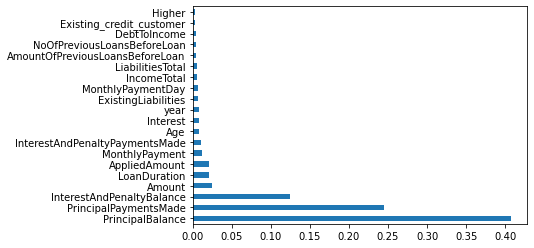

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [52]:
s = feat_importances.nlargest(20)

In [53]:
s.index

Index(['PrincipalBalance', 'PrincipalPaymentsMade',
       'InterestAndPenaltyBalance', 'Amount', 'LoanDuration', 'AppliedAmount',
       'MonthlyPayment', 'InterestAndPenaltyPaymentsMade', 'Age', 'Interest',
       'year', 'ExistingLiabilities', 'MonthlyPaymentDay', 'IncomeTotal',
       'LiabilitiesTotal', 'AmountOfPreviousLoansBeforeLoan',
       'NoOfPreviousLoansBeforeLoan', 'DebtToIncome',
       'Existing_credit_customer', 'Higher'],
      dtype='object')

In [131]:
X = X[list(s.index)]

In [133]:
len(X.columns)

20

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=420)

##### Applying non private Tree based model on DP data

In [135]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators = 100,random_state = 30 )
model1.fit(X_train,y_train)
prediction_test1 = model1.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, prediction_test1)
print(conf_matrix)

print(classification_report(y_test, prediction_test1))

[[ 7117     0]
 [    0 11230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7117
           1       1.00      1.00      1.00     11230

    accuracy                           1.00     18347
   macro avg       1.00      1.00      1.00     18347
weighted avg       1.00      1.00      1.00     18347



In [139]:

from sklearn.datasets import make_classification
from diffprivlib.models import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier(n_estimators=100,random_state=30, epsilon=1, n_jobs=1, verbose=0, accountant=None, feature_domains=None)

model.fit(X_train,y_train)
prediction_test=model.predict(X_test)

C:\Users\Goutam\anaconda3\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'feature_domains' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
C:\Users\Goutam\anaconda3\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\Goutam\anaconda3\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential p

In [141]:
prediction_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [142]:
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

[[    0  7117]
 [    0 11230]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7117
           1       0.61      1.00      0.76     11230

    accuracy                           0.61     18347
   macro avg       0.31      0.50      0.38     18347
weighted avg       0.37      0.61      0.46     18347



C:\Users\Goutam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Goutam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Goutam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
X_train['VerificationType'].unique()

array(['Income_unverified', 'Income_expenses_verified', 'Income_verified',
       'Income_unverified_crossref_phone'], dtype=object)

In [58]:
categorical_columns

{'City',
 'Country',
 'Education',
 'EmploymentDurationCurrentEmployer',
 'EmploymentStatus',
 'FirstPaymentDate',
 'Gender',
 'HomeOwnershipType',
 'LanguageCode',
 'LastPaymentOn',
 'LoanDate',
 'MaritalStatus',
 'MaturityDate_Last',
 'MaturityDate_Original',
 'NewCreditCustomer',
 'OccupationArea',
 'Rating',
 'Restructured',
 'UseOfLoan',
 'VerificationType'}

In [ ]:
Education
EmploymentStatus
HomeOwnershipType
MaritalStatus
NewCreditCustomer
OccupationArea
Rating
Restructured
VerificationType

In [59]:
X_train['Education'].unique()

array(['Higher', 'Secondary', 'Vocational', 'Basic', 'Primary'],
      dtype=object)

In [61]:
X_train['EmploymentStatus'].unique()

array(['Fully', 'Not_specified', 'Partially', 'Entrepreneur', 'Retiree',
       'Self_employed'], dtype=object)

In [62]:
X_train['HomeOwnershipType'].unique()

array(['Owner', 'Tenant_pre_furnished_property',
       'Tenant_unfurnished_property', 'Living_with_parents', 'Mortgage',
       'Other', 'Joint_tenant', 'Joint_ownership', 'Council_house',
       'Owner_with_encumbrance', 'Homeless'], dtype=object)

In [63]:
X_train['MaritalStatus'].unique()

array(['Single', 'Not_specified', 'Married', 'Cohabitant', 'Divorced',
       'Widow'], dtype=object)

In [65]:
X_train['NewCreditCustomer'].unique()

array(['New_credit_Customer', 'Existing_credit_customer'], dtype=object)

In [67]:
X_train['OccupationArea'].unique()

array(['Retail_and_wholesale', 'Not_specified', 'Other', 'Administrative',
       'Construction', 'Transport_and_warehousing',
       'Healthcare_and_social_help', 'Processing',
       'Finance_and_insurance', 'Agriculture_forestry_and_fishing',
       'Energy', 'Civil_service_and_military', 'Education',
       'Hospitality_and_catering', 'Art_and_entertainment', 'Utilities',
       'Info_and_telecom', 'Real_estate', 'Research', 'Mining'],
      dtype=object)

In [68]:
X_train['Rating'].unique()

array(['HR', 'C', 'E', 'F', 'D', 'B', 'AA', 'A'], dtype=object)

In [69]:
X_train['Restructured'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
X_train['VerificationType'].unique()

array(['Income_unverified', 'Income_expenses_verified', 'Income_verified',
       'Income_unverified_crossref_phone'], dtype=object)

In [71]:
df['LanguageCode'].unique()

array(['Estonian', 'Russian', 'English', 'Finnish', 'Spanish', 'Others',
       'Slovakian', 'German'], dtype=object)